# Неделя 2. Среда 

## Математический анализ

In [2]:
# Имортируй библиотеки
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
import numpy as np

### Анализ

❓Что значит, что производная в точке равна нулю? 

> В этой точке функция имеет точку перегиба, меняет свое направление роста/убывания. Например, высшая/низшая точка в параболе

Найдите производную функций ниже

1. $y = \dfrac{3x^7}{7}$

$y' = 3x^6$

2. $y = -7$

$y' = 0$

3. $y = \dfrac{9}{x}$

$y' = -9/x^2$

4. $y = 11 - 6x$

$y' = -6$

5. $y = 8\sqrt{x} + 7\sin{x}$

$y' = 4/\sqrt{x} + 7\cos{x}$

6. $y = \dfrac{\sin{x}}{5x}$

$y' = \dfrac{x\cos{x} - \sin{x}}{5x^2}$


7. $y = \dfrac{\cot{x} + 2}{3x}$

$y' = \dfrac{-x\sin{x} - \cos{x} - 2}{3x^2}$

8. $y = (3-7x)^9$

$y' = -63(3-7x)^8$

9. Найдите производную в точке $t = 3$:

$y(t) = t^6 - 4t^3$

$6t^5 - 12t^2 = 1350$


<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "calculus tasks in progress"`
4. Выполни команду `git push`

### Градиентный спуск

#### 1. Градиентный спуск функции одного переменного

1. Задай функцию `loss`: она будет возвращать значение функции в точке. Для начала можно использовать простую функцию, например: 
$$L(\omega) = \omega^2 + 3$$

In [6]:
def loss(w):
    loss = w**2 + 3
    return loss

2. Задай функцию `derivative` - она будет возвращать значение производной функции `loss` в точке. 

In [4]:
def derivative(w):
    return 2*w

3. Задай функцию `step` - она будет возвращать новое значение весов по формуле:
$$w_{i+1} = w_i - \lambda \cdot \frac{\partial f(w)}{\partial w_i}$$

Входные аргументы: `w` - текущее значение параметра, `lambda` – скорость спуска. 

In [10]:
def step(w, _lambda):
    '''
    input:
        _lambda - learning rate
    
    returns: 
        coord - w_coord
        loss_value  - y_coord
    '''
    coord = w - _lambda * derivative(w)
    loss_value = loss(coord)
    
    return coord, loss_value

4. Задай функцию `get_minima`, которая будет возвращать список, содержащий все значения параметра `w`, и список `loss_values`, который будет содержать значения функции `loss` для соответствующего параметра `w`. На вход функции поступает `w_0` – начальное значение параметра, `eps` – критерий останова. `lambda` - скорость спуска, которая будет передаваться в функцию `step`

In [11]:
def get_minima(w_0, eps, _lambda): 
    ws = [w_0]
    loss_values = [loss(w_0)]
    delta = eps+1
    w_current = w_0
    while eps <= delta:
        w_next, lv_next = step(w_current, _lambda)
        ws.append(w_next)
        loss_values.append(lv_next)
        delta = abs(w_next - w_current)
        w_current = w_next
    
    return ws, loss_values

Нарисуй график функции `loss`. По координатам, возвращенным функцией `get_minima` нарисуй график движения градиентного спуска. 

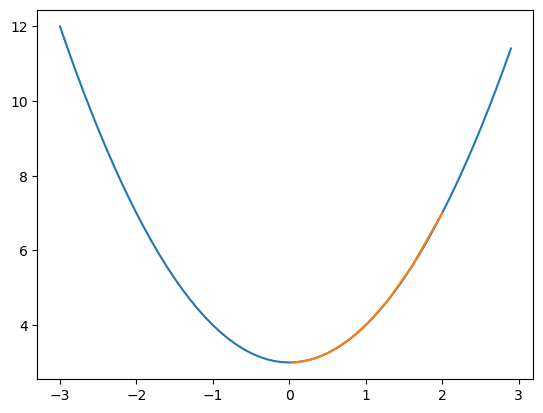

In [12]:
import seaborn as sns
ws, loss_values = get_minima(2, 0.01, 0.1)

xx = np.arange(-3, 3, 0.1)
xl = loss(xx)

sns.lineplot(x=xx, y=xl)
sns.lineplot(x=ws, y=loss_values)

Нарисуй несколько графиков, соответствующих разным коэффициентам $\lambda$. 

20 11


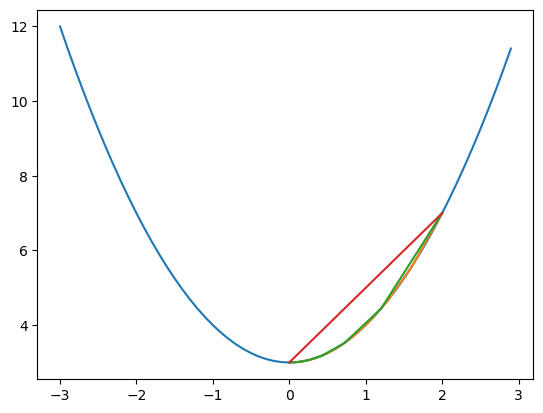

In [18]:
ws_01, loss_values_01 = get_minima(2, 0.01, 0.1)
ws_05, loss_values_05 = get_minima(2, 0.01, 0.5)
ws_02, loss_values_02 = get_minima(2, 0.01, 0.2)
ws_02_, loss_values_02_ = get_minima(200, 0.01, 0.2)

xx = np.arange(-3, 3, 0.1)
xl = loss(xx)

sns.lineplot(x=xx, y=xl)
sns.lineplot(x=ws_01, y=loss_values_01)
sns.lineplot(x=ws_02, y=loss_values_02)
sns.lineplot(x=ws_05, y=loss_values_05)

print(len(ws_02_), len(ws_02))

❓ Как выбрать оптимальную скорость обучения?

Поставить настолько большую lambda, насколько возможно, чтобы минимальными шагами дойти до eps, не перевалив за минимум функции

❓Будет ли зависеть скорость работы всей процедуры от начального выбора значения искомого параметра?

Да, большие значения требуют больше шагов

Поэкспериментируй с результатом, задай функцию: 
$$L(\omega) = \omega^2 - \omega$$

20 11


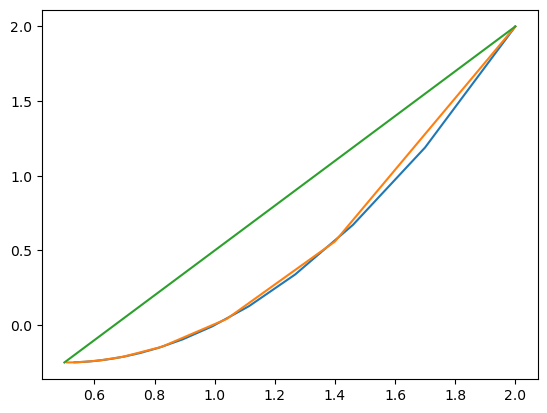

In [20]:
def loss(w):
    loss = w**2 - w
    return loss

def derivative(w):
    return 2*w - 1


ws_01, loss_values_01 = get_minima(2, 0.01, 0.1)
ws_05, loss_values_05 = get_minima(2, 0.01, 0.5)
ws_02, loss_values_02 = get_minima(2, 0.01, 0.2)
ws_02_, loss_values_02_ = get_minima(200, 0.01, 0.2)


sns.lineplot(x=ws_01, y=loss_values_01)
sns.lineplot(x=ws_02, y=loss_values_02)
sns.lineplot(x=ws_05, y=loss_values_05)

print(len(ws_02_), len(ws_02))


#### 2. Градиентный спуск для функции двух переменных

1. Модифицируй функции из предыдущего задания и реализуй поиск минимума функции двух переменных. 
Функция для минимизации: 
$$\mathcal{L} (\omega_1, \omega_2) = \omega_1^2 + 2\omega_2^2 - 3\omega_1 - 4\omega_2$$

В конце визуализируй результат аналогично предыдущему заданию.


__P.S__: для данной функции, минимальное значение достигается в точке $(\dfrac{3}{2}; 1)$. Это необходимо для самопроверки

In [21]:
def loss2(ws):
    w_1, w_2, *_ = ws
    return w_1**2 + 2*w_2**2 - 3*w_1 - 4*w_2

In [22]:
def derivative2(ws):
    w_1, w_2, *_ = ws
    deriv_1 = 2*w_1 - 3
    deriv_2 = 4*w_2 - 4
    return np.array([deriv_1, deriv_2])

In [23]:
def step2(ws, _lambda):
    w_1, w_2, *_ = ws
    
    coord_1 = w_1 - _lambda * derivative(w_1)
    coord_2 = w_2 - _lambda * derivative(w_2)
    coords = np.array([coord_1, coord_2])
    loss_value = loss2(coords)
    
    return coords, loss_value

In [24]:
def get_minima2(ws, eps, _lambda):    
    wx = [np.array(ws)]
    loss_values = [loss2(ws)]
    
    delta = eps+1
    ws_current = ws
    while eps <= delta:
        ws_next, lv_next = step2(ws_current, _lambda)
        wx.append(ws_next)
        loss_values.append(lv_next)
        delta = abs(loss2(ws_next) - loss2(ws_current))
        ws_current = ws_next
    
    return wx, loss_values

In [25]:
########
# PRODUCED IN COLLABORATION WITH CHATGPT. THANKS SAMA
########

import plotly.graph_objects as go

def loss2(ws):
    w_1, w_2, *_ = ws
    return w_1**2 + 2*w_2**2 - 3*w_1 - 4*w_2

# Given gradient descent path
wx, loss = get_minima2([3,2], 0.3, 0.1)

# Extract descent path points
w0_path = [w[0] for w in wx]
w1_path = [w[1] for w in wx]
z_path = loss  # Loss values as z-axis

# Define a grid for surface plot
w0_range = np.linspace(min(w0_path) - 0.5, max(w0_path) + 0.5, 50)
w1_range = np.linspace(min(w1_path) - 0.5, max(w1_path) + 0.5, 50)
W0, W1 = np.meshgrid(w0_range, w1_range)  # Create grid

# Compute loss function for the grid
Z = np.array([[loss2([w0, w1]) for w0 in w0_range] for w1 in w1_range])

# Create interactive 3D plot
fig = go.Figure()

# Add the loss function surface
fig.add_trace(go.Surface(
    x=W0, y=W1, z=Z, 
    colorscale="Viridis", 
    opacity=0.7,  # Slightly transparent to see the descent path
    name="Loss Surface"
))

# Add the descent path
fig.add_trace(go.Scatter3d(
    x=w0_path, y=w1_path, z=z_path,
    mode='lines+markers',
    marker=dict(size=5, color='red', opacity=1),
    line=dict(width=4, color='red'),
    name='Descent Path'
))

# Update layout
fig.update_layout(
    title="Interactive 3D Gradient Descent with Loss Surface",
    scene=dict(
        xaxis_title="w0",
        yaxis_title="w1",
        zaxis_title="Loss"
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show interactive plot
fig.update_layout(
    width=1200,  # Adjust width
    height=800,  # Adjust height
    margin=dict(l=0, r=0, b=0, t=40)  # Keep margins minimal
)
fig.show()

ModuleNotFoundError: No module named 'plotly'

2. С помощью градиентного _спуска_ можно найти и __максимум__ функции, для этого нужно внести небольшое изменение в формулу обновления весов. Попробуйте сделать это и визуализировать результат: 
$$L(w_1, w_2) = \dfrac{1}{1+w_1^2} + \dfrac{1}{1+w_2^2}$$  


__P.S__: для данной функции, максимальное значение достигается в точке $(0; 0)$. Это необходимо для самопроверки

In [ ]:
# code

3. С помощью градиентного спуска найти минимум функции и визуализировать результат. Незабывайте, код у вас уже реализован в предыдущих заданиях, примените его.  
$$L(w1, w2) = (5 \cdot \omega_1)^2 + \omega_2^2$$

In [ ]:
# code

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "calculus tasks stage 2"`
4. Выполни команду `git push`

#### Адаптивная скорость обучения

Модифицируй одну из предыдущих реализаций, добавив [адаптивный подбор скорости обучения](https://en.wikipedia.org/wiki/Learning_rate) (time-based, step-based, exponential)

In [ ]:
# code

#### Решение системы линейных уравнений с помощью градиентного спуска


Реализуй класс `Solver` для вычисления решения системы линейных уравнений произвольного размера.  

Логика работы класса должна быть следующей: 

```python

solver = Solver(X, y)
solver.fit(learning_rate=0.01, n_iter=10)
print(solver.mse())
>>> Mean squared error: 0.00313
print(solver.coef_)
>>> [.5, 1, -2]

```

`X` – матрица системы

`y` – вектор ответов

`learning_rate` – шаг градинтного спуска

`n_iter` - число итераций. 

Метод `mse` вычисляет среднеквадратическую ошибку: `sum((y - X@w)**2) / len(w)`, где `w` - искомый вектор коэффициентов. 

Попробуй решить с помощью реализованного класса систему уравнений:
$$
\begin{cases}
2w_1 + 3w_2 - w_3 = 9 \\
w_1 -2w_2 + w_3 = 3 \\
w_1 + 2w_3 = 2
\end{cases}
$$

Решение уравнения выше – 4, 0, -1. Значения, которые ты получишь в процессе оптимизации могут незначительно отличаться. 


In [150]:
X = np.array([
    [2, 3, -1], 
    [1, -2, 1],
    [1, 0, 2]
])

y = np.array([9, 3, 2])

In [154]:
# code

In [152]:
solver = Solver(X, y)
solver.fit(0.1, 100)
solver.mse()

#### Реализация класса оптимизатора

Реализуй класс, который `Optimizer`, который будет решать задачу минимизации функции, сохранения истории процедуры, визуализации и возможностью выбирать один из типов управления скоростью обучения. Добавь возможность задания параметра для реализации остановки. 

In [8]:
class Optimizer():
    pass

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Сохрани файл для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "calculus tasks completed"`
4. Выполни команду `git push`